# 通过网页新闻确定大致时间段

In [ ]:
import time
import pandas as pd
from selenium import webdriver
from datetime import datetime as datetime
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
import time,json,string,requests,urllib.parse,eventlet,random
from requests.adapters import HTTPAdapter
pd.set_option('max_colwidth',100)
pd.set_option('display.max_rows', None)

# proxy = '125.108.112.49:9000'
# user_agent = "Mozilla/4.0 (compatible; MSIE 7.0; Windows NT 6.0)"
# chrome_options = webdriver.ChromeOptions()
# chrome_options.add_argument('--proxy-server=' + proxy)
# chrome_options.add_argument('--user-agent=%s' % user_agent)
driver = webdriver.Chrome(executable_path=r'D:\Anaconda3\chromedriver.exe')
driver.implicitly_wait(10)  # 隐式等待，防止网络不稳定引起的报错

# Google
key_word = '"江淮气旋" -道客 -资料 -考试 -上学吧 -百科 -文库 -摘要 -学术'
url_google = 'https://www.google.com/search?q=%s&tbs=cdr:1,cd_min:1/1/2018,cd_max:12/31/2018'%key_word

data = pd.DataFrame({'date':[], 'title':[], 'content':[]})
driver.get(url_google)
WebDriverWait(driver, 1000).until(EC.presence_of_element_located((By.XPATH, '//tbody//td/a[@class="fl"]')))
page_element = len(driver.find_elements(By.XPATH, '//tbody//td/a[@class="fl"]'))
for i in range(page_element+1):
    temp =pd.DataFrame([])
    WebDriverWait(driver, 1000).until(EC.presence_of_element_located((By.XPATH, '//div[@id="rso"]/div//span[@class="f"]')))
    date = driver.find_elements(By.XPATH,'//div[@id="rso"]/div//span[@class="f"]')
    title = driver.find_elements(By.XPATH,'//div[@id="rso"]/div//h3[@class="LC20lb DKV0Md"]')
    content = driver.find_elements(By.XPATH,'//div[@id="rso"]/div//span[@class="st"]')
    temp['date'] = [x.text.split(' ')[0] for x in date]
    temp['title'] = [x.text for x in title]
    temp['content'] = [x.text for x in content]
    data = data.append(temp)
    if i < page_element:
        next_page = driver.find_element(By.XPATH, "//span[text()='下一页']")
        next_page.click()
data['date'] = data['date'].apply(lambda x:datetime.strptime(x,'%Y年%m月%d日'))
data['value'] = 1

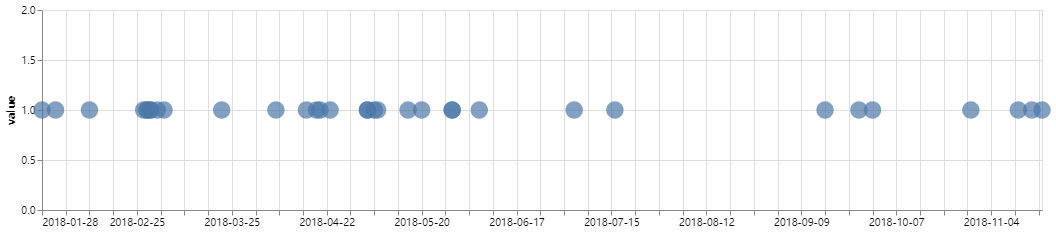

In [34]:
import altair as alt
alt.data_transformers.enable('default', max_rows = None) # 避免警告数据量超过5000

chart = (alt
         .Chart(data)
         .mark_circle(size=300)
         .encode(
             alt.X("date:T", title=None, axis=alt.Axis(format='%Y-%m-%d')),
             alt.Y("value:Q", scale=alt.Scale(domain=[0,2])),
             tooltip=[alt.Tooltip('content:O', title='类型')],
         )
         .properties(width=1000, height=200)
         
        )
chart
         

# 展示

In [1]:
import pandas as pd
from IPython.display import IFrame, display
def display_earth(date, orthographic):
    date = date.strftime('%Y/%m/%d')
    string = '\n%s：\n'%date
    print("\033[1;31m%s\033[0m"%string)
    url = 'https://earth.nullschool.net/zh-cn/#%s/0000Z/wind/surface/level/orthographic=%s/loc=-120.000,0.000'%(date, orthographic)
    display(IFrame(url, width=1000, height=400))
    return(None)
orthographic = '-242.74,31.02,3000'

## ('2018/01/21', '2018/01/26')

In [9]:
date_range = pd.date_range('2018/01/21', '2018/01/26')
for date in date_range:
    display_earth(date, orthographic)


2018/01/21：




2018/01/22：




2018/01/23：




2018/01/24：




2018/01/25：




2018/01/26：



## ('2018/02/28', '2018/03/04')

In [10]:
date_range = pd.date_range('2018/02/26', '2018/03/04')
for date in date_range:
    display_earth(date, orthographic)


2018/02/26：




2018/02/27：




2018/02/28：




2018/03/01：




2018/03/02：




2018/03/03：




2018/03/04：



## ('2018/03/16', '2018/03/22')

In [11]:
date_range = pd.date_range('2018/03/16', '2018/03/22')
for date in date_range:
    display_earth(date, orthographic)


2018/03/16：




2018/03/17：




2018/03/18：




2018/03/19：




2018/03/20：




2018/03/21：




2018/03/22：



## ('2018/06/12', '2018/06/16')

In [14]:
date_range = pd.date_range('2018/06/12', '2018/06/19')
for date in date_range:
    display_earth(date, orthographic)


2018/06/12：




2018/06/13：




2018/06/14：




2018/06/15：




2018/06/16：




2018/06/17：




2018/06/18：




2018/06/19：



## ('2018/06/12', '2018/06/16')

In [15]:
date_range = pd.date_range('2018/06/12', '2018/06/19')
for date in date_range:
    display_earth(date, orthographic)


2018/06/12：




2018/06/13：




2018/06/14：




2018/06/15：




2018/06/16：




2018/06/17：




2018/06/18：




2018/06/19：



## ('2018/09/24', '2018/09/30')

In [16]:
date_range = pd.date_range('2018/09/24', '2018/09/30')
for date in date_range:
    display_earth(date, orthographic)


2018/09/24：




2018/09/25：




2018/09/26：




2018/09/27：




2018/09/28：




2018/09/29：




2018/09/30：



## ('2018/09/24', '2018/09/30')

In [19]:
date_range = pd.date_range('2018/09/24', '2018/09/30')
for date in date_range:
    display_earth(date, orthographic)


2018/09/24：




2018/09/25：




2018/09/26：




2018/09/27：




2018/09/28：




2018/09/29：




2018/09/30：

